# Обработка стали

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали в конце процесса легирования.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами.

Требуемый химический состав достигается при помощи примесей: добавлением кусков сплава из бункера для сыпучих материалов или проволоки из специальный трайб-аппарат.

Перед тем как первый раз ввести добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют необходимые материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Затем расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. 

Данные состоят из файлов, полученных из разных источников:

- *data_arc.csv* — данные о нагреве электродами
- *data_bulk.csv* — данные о подаче сыпучих материалов (объём)
- *data_bulk_time.csv* — данные о подаче сыпучих материалов (время)
- *data_wire.csv* — данные о проволочных материалах (объём)
- *data_wire_time.csv* — данные о проволочных материалах (время)
- *data_gas.csv* — данные о продувке газом
- *data_temp.csv* — результаты измерения температуры

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Данные-о-нагреве" data-toc-modified-id="Данные-о-нагреве-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Данные о нагреве</a></span></li><li><span><a href="#Данные-о-присадках" data-toc-modified-id="Данные-о-присадках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Данные о присадках</a></span></li><li><span><a href="#Данные-о-продуве-газом" data-toc-modified-id="Данные-о-продуве-газом-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Данные о продуве газом</a></span></li><li><span><a href="#Данные-о-температурах" data-toc-modified-id="Данные-о-температурах-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Данные о температурах</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Построение-модели-машинного-обучения" data-toc-modified-id="Построение-модели-машинного-обучения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Выделение-признаков-и-таргета" data-toc-modified-id="Выделение-признаков-и-таргета-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выделение признаков и таргета</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Отчет</a></span><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Данные-и-признаки" data-toc-modified-id="Данные-и-признаки-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Данные и признаки</a></span></li><li><span><a href="#Модели" data-toc-modified-id="Модели-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модели</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li></ul></div>

## Подготовка данных

In [1]:
import time

start = time.time()

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

**Данные о нагреве электродами**

In [3]:
def get_info(data):
    display(data.head())
    
    print("\nВсего строк:", data.shape[0])
    print("Уникальных номеров партий:", len(data['key'].unique()), '\n')
    print("Количество пропусков в данных:\n", data.isna().sum().to_string(), '\n', sep='')
    print("Количество дубликатов:", data.duplicated().sum())

data_arc = pd.read_csv('datasets/final_steel/data_arc.csv')
get_info(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.98,0.69
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.81,0.52
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.74,0.50
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.66,1.06
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.69,0.41



Всего строк: 14876
Уникальных номеров партий: 3214 

Количество пропусков в данных:
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0

Количество дубликатов: 0


Переименуем столбцы:

In [4]:
data_arc.columns = ['key', 'start', 'finish', 'a_power', 'r_power']

**Данные о добавках**

Данные о подаче сыпучих материалов:
- *data_bulk.csv* — объём
- *data_bulk_time.csv* — время

Данные о подаче проволочных материалов:
- *data_wire.csv* — объём
- *data_wire_time.csv* — время

В разных таблицах время не синхронизировано, поэтому мы не можем одновременно использовать время разных таблиц. Так же мы не можем использовать таблицы *data_bulk_time.csv* и *data_wire_time.csv*.

In [5]:
data_bulk = pd.read_csv('datasets/final_steel/data_bulk.csv')

pd.options.display.float_format = '{:,.0f}'.format
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206,NaN,150,154
1,2,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206,NaN,149,154
2,3,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,NaN,152,153
3,4,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207,NaN,153,154
4,5,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203,NaN,151,152


In [6]:
data_wire = pd.read_csv('datasets/final_steel/data_wire.csv')
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Формат данных в 2 таблицах идентичен: 

- `key` - номер партии
- `Bulk i`, `Wire i` - объем материала, введенного в партии

Объединим данные в общую таблицу и переименуем столбцы:

In [7]:
data_addings = data_bulk.merge(data_wire, on='key')
del data_bulk, data_wire
    
data_addings.columns = ['_'.join(name.lower().split()) for name in data_addings.columns]
get_info(data_addings)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,...,154,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,...,154,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,...,153,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,...,154,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,...,152,89,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Всего строк: 3025
Уникальных номеров партий: 3025 

Количество пропусков в данных:
key           0
bulk_1     2773
bulk_2     3003
bulk_3     1732
bulk_4     2012
bulk_5     2948
bulk_6     2453
bulk_7     3001
bulk_8     3024
bulk_9     3006
bulk_10    2849
bulk_11    2848
bulk_12     667
bulk_13    3007
bulk_14     314
bulk_15     789
wire_1       25
wire_2     1974
wire_3     2962
wire_4     3011
wire_5     3024
wire_6     2952
wire_7     3014
wire_8     3006
wire_9     3000

Количество дубликатов: 0


**Данные о продуве газом**

In [8]:
data_gas = pd.read_csv('datasets/final_steel/data_gas.csv')

data_gas.columns = ['key', 'gas_1']
get_info(data_gas)

,key,gas_1
0,1,30
1,2,13
2,3,29
3,4,19
4,5,5



Всего строк: 3239
Уникальных номеров партий: 3239 

Количество пропусков в данных:
key      0
gas_1    0

Количество дубликатов: 0


**Данные о замерах температуры**

In [9]:
data_temp = pd.read_csv('datasets/final_steel/data_temp.csv')
get_info(data_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,"1,571"
1,1,2019-05-03 11:25:53,"1,604"
2,1,2019-05-03 11:29:11,"1,618"
3,1,2019-05-03 11:30:01,"1,601"
4,1,2019-05-03 11:30:39,"1,613"



Всего строк: 15907
Уникальных номеров партий: 3216 

Количество пропусков в данных:
key                0
Время замера       0
Температура     2901

Количество дубликатов: 0


In [10]:
data_temp.columns = ['key', 'time', 'temperature']

## Анализ данных

### Данные о нагреве

Для исследования введем дополнительные столбцы:

*1. Полная мощность* - корень из суммы квадратов активной и реактивной мощности.

In [11]:
p_a = data_arc['a_power']
p_r = data_arc['r_power']
data_arc['power'] = (p_a ** 2 + p_r ** 2) ** 0.5
del p_a, p_r

In [12]:
data_arc

,key,start,finish,a_power,r_power,power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,1,1,1
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,1,1,1
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,1,0,1
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,2,1,2
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,1,0,1
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,1,0,1
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,1,1,1
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,1,0,1
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0,0,0


*2. Продолжительность нагрева* - время между началом и концом нагрева в секундах.

In [13]:
data_arc['start'] = pd.to_datetime(data_arc['start'])
data_arc['finish'] = pd.to_datetime(data_arc['finish'])

data_arc['t'] = (data_arc['finish'] - data_arc['start']).dt.total_seconds().astype(int)

Больше нам не понадобятся данные о начале и конце нагрева.

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
data_arc = data_arc.drop(['start', 'finish'], axis=1)

Рассмотрим данные подробнее.

In [15]:
data_arc.loc[:, 'a_power':].describe()

,a_power,r_power,power,t
count,"14,876.00","14,876.00","14,876.00","14,876.00"
mean,0.67,0.45,0.89,171.67
std,0.41,5.88,5.88,98.19
min,0.03,-715.50,0.04,11.00
25%,0.40,0.29,0.50,107.00
50%,0.56,0.42,0.69,147.00
75%,0.86,0.64,1.07,214.00
max,3.73,2.68,715.51,907.00


Присутствует явно аномальное значение 715 в реактивной мощности и, как следствие, в полной. Уберем партию с аномальным значением.

In [16]:
drop_keys = data_arc.loc[data_arc['r_power'].idxmin(), 'key']
drop_indices = data_arc[data_arc['key'] == drop_keys].index
data_arc = data_arc.drop(drop_indices)

Рассмотрим распределения величин:

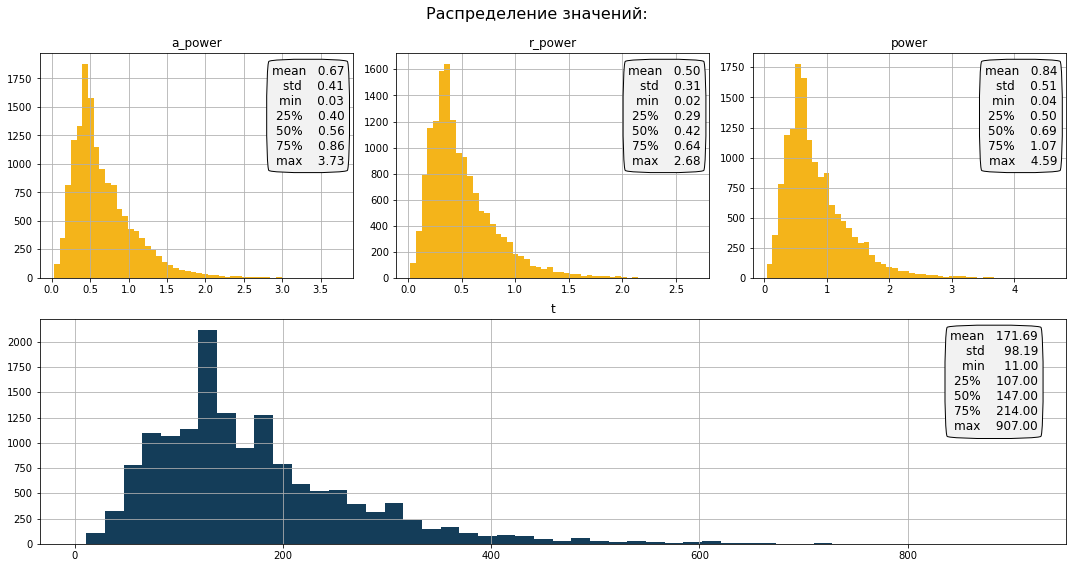

In [17]:
fig, ax = plt.subplot_mosaic([[0, 1, 2],
                               [3, 3, 3]])
fig.set_figheight(8)
fig.set_figwidth(15)

for i in range(4):
    col = data_arc.columns[i + 1]#column name  
    axis = ax[i]#choosing axis
    color = ['#143d59', '#f4b41a']['power' in col]#choosing plot color
    
    data_arc[col].hist(bins=50, ax=axis, color=color)    
    axis.set_title(col)
    # extra info
    s = data_arc[col].describe()['mean':].to_string()                
    axis.text(0.973, 0.95, s, fontsize=12, transform=axis.transAxes, bbox=dict(boxstyle="round4,pad=.5", fc="0.95"),
             horizontalalignment='right', verticalalignment='top')  

fig.tight_layout()
fig.suptitle('Распределение значений:', fontsize=16)
plt.subplots_adjust(top=0.9)
None

Все столбцы имеют схожие по форме распределения. Проверим распределения на нормальность при помощи критерия Колмогорова:

In [18]:
def check_distribution(data):
    for col in data.columns:
        print(col + ':', kstest(data[col], 'norm').pvalue)
        
check_distribution(data_arc.loc[:, 'a_power':])

a_power: 0.0
r_power: 0.0
power: 0.0
t: 0.0


Распределения не являются нормальными. Рассмотрим корреляцию Спирмена:

In [19]:
data_arc.loc[:, 'a_power':].corr(method='spearman')

,a_power,r_power,power,t
a_power,1.00,0.97,0.99,0.97
r_power,0.97,1.00,0.99,0.97
power,0.99,0.99,1.00,0.98
t,0.97,0.97,0.98,1.00


Между величинами наблюдается полная корреляция. Возможно, данные о мощности представлены как среднее за время нагрева. Эту особенность нужно иметь в виду при выборе признаков: мы можем оставить только один из них. Также необходимо реорганизовать набор данных так, чтобы одной партии соответсвовала одна строка. 

В качестве основного признака будем использовать полную мощность. Продолжительность 1 итерации нагрева будем использовать в качестве весового коэффициента.

In [20]:
data_heating = pd.DataFrame(data_arc.groupby('key')[['power', 't']]\
                       .agg('sum').reset_index())

In [21]:
data_heating

,key,power,t
0,1,5.83,1098
1,2,3.65,811
2,3,2.99,655
3,4,3.81,741
4,5,4.04,869
...,...,...,...
3208,3237,4.84,909
3209,3238,2.70,546
3210,3239,5.61,1216
3211,3240,3.89,839


Рассмотрим распределение усредненной мощности нагрева по партиям:

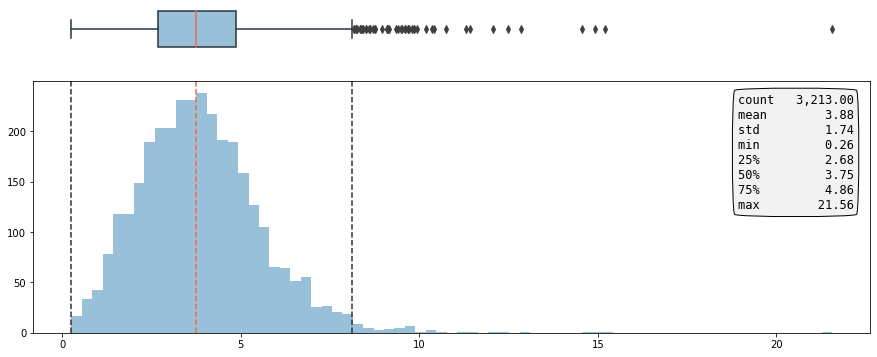

In [22]:
def get_boxplot_values(col):
    median = col.median()
    
    upper_quartile = col.quantile(0.75)
    lower_quartile = col.quantile(0.25)
    
    iqr = upper_quartile - lower_quartile
    
    lower_whisker = col[col >= lower_quartile - 1.5 * iqr].min()
    upper_whisker = col[col <= upper_quartile + 1.5 * iqr].max()
    
    result = [median, upper_whisker, lower_whisker]
    
    return result 


def boxplot_hist(col):
    
    c = ['#ee6c4d', '#293241', '#98c1d9']

    fig, axes = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data=col, orient="h", ax=axes[0],
                boxprops=dict(facecolor=c[2], edgecolor=c[1]),
                medianprops=dict(color=c[0]),
                capprops=dict(color=c[1]),
                whiskerprops=dict(color=c[1]),
                flierprops=dict(color=c[1])
               )
    axes[0].axis('off')
    s = col.describe().to_string()
        
    i=1
    for value in get_boxplot_values(col):
        axes[1].axvline(x=value, ls='--', c=c[i//2])
        i += 1

    col.hist(bins='auto', figsize=(15, 6), ax=axes[1], grid=False, color=c[2])
    axes[1].text(0.98, 0.95, s, fontsize=12, transform=axes[1].transAxes, bbox=dict(boxstyle="round4,pad=.5", fc="0.95"),
             multialignment='left', horizontalalignment='right', verticalalignment='top',
             fontfamily='monospace')
    
    
boxplot_hist(data_heating['power'])

In [23]:
data_heating['power'].describe()

count   3,213.00
mean        3.88
std         1.74
min         0.26
25%         2.68
50%         3.75
75%         4.86
max        21.56
Name: power, dtype: float64

Чтобы избавиться от грубых ошибок, воспользуемя следующей схемой:

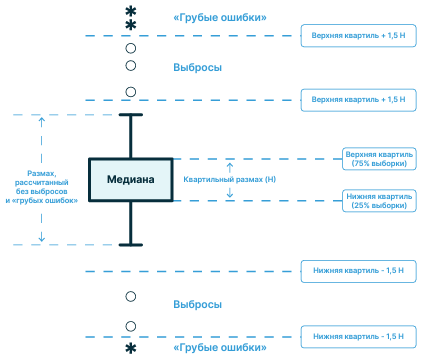

In [24]:
def thresholds(data):
    H = data_heating['power'].quantile(0.75) - data_heating['power'].quantile(0.25)
    upper_threshold = data_heating['power'].quantile(0.75) + 3 * H
    lower_threshold = data_heating['power'].quantile(0.25) - 3 * H
    return [lower_threshold, upper_threshold]

threshold = thresholds(data_heating['power'])

drop_indices = data_heating.loc[(data_heating['power'] <= threshold[0]) |\
                                (data_heating['power'] >= threshold[1])].index
                                
data_heating = data_heating.drop(drop_indices)

### Данные о присадках

Пропуски означают, что добавка не была использована в партии.

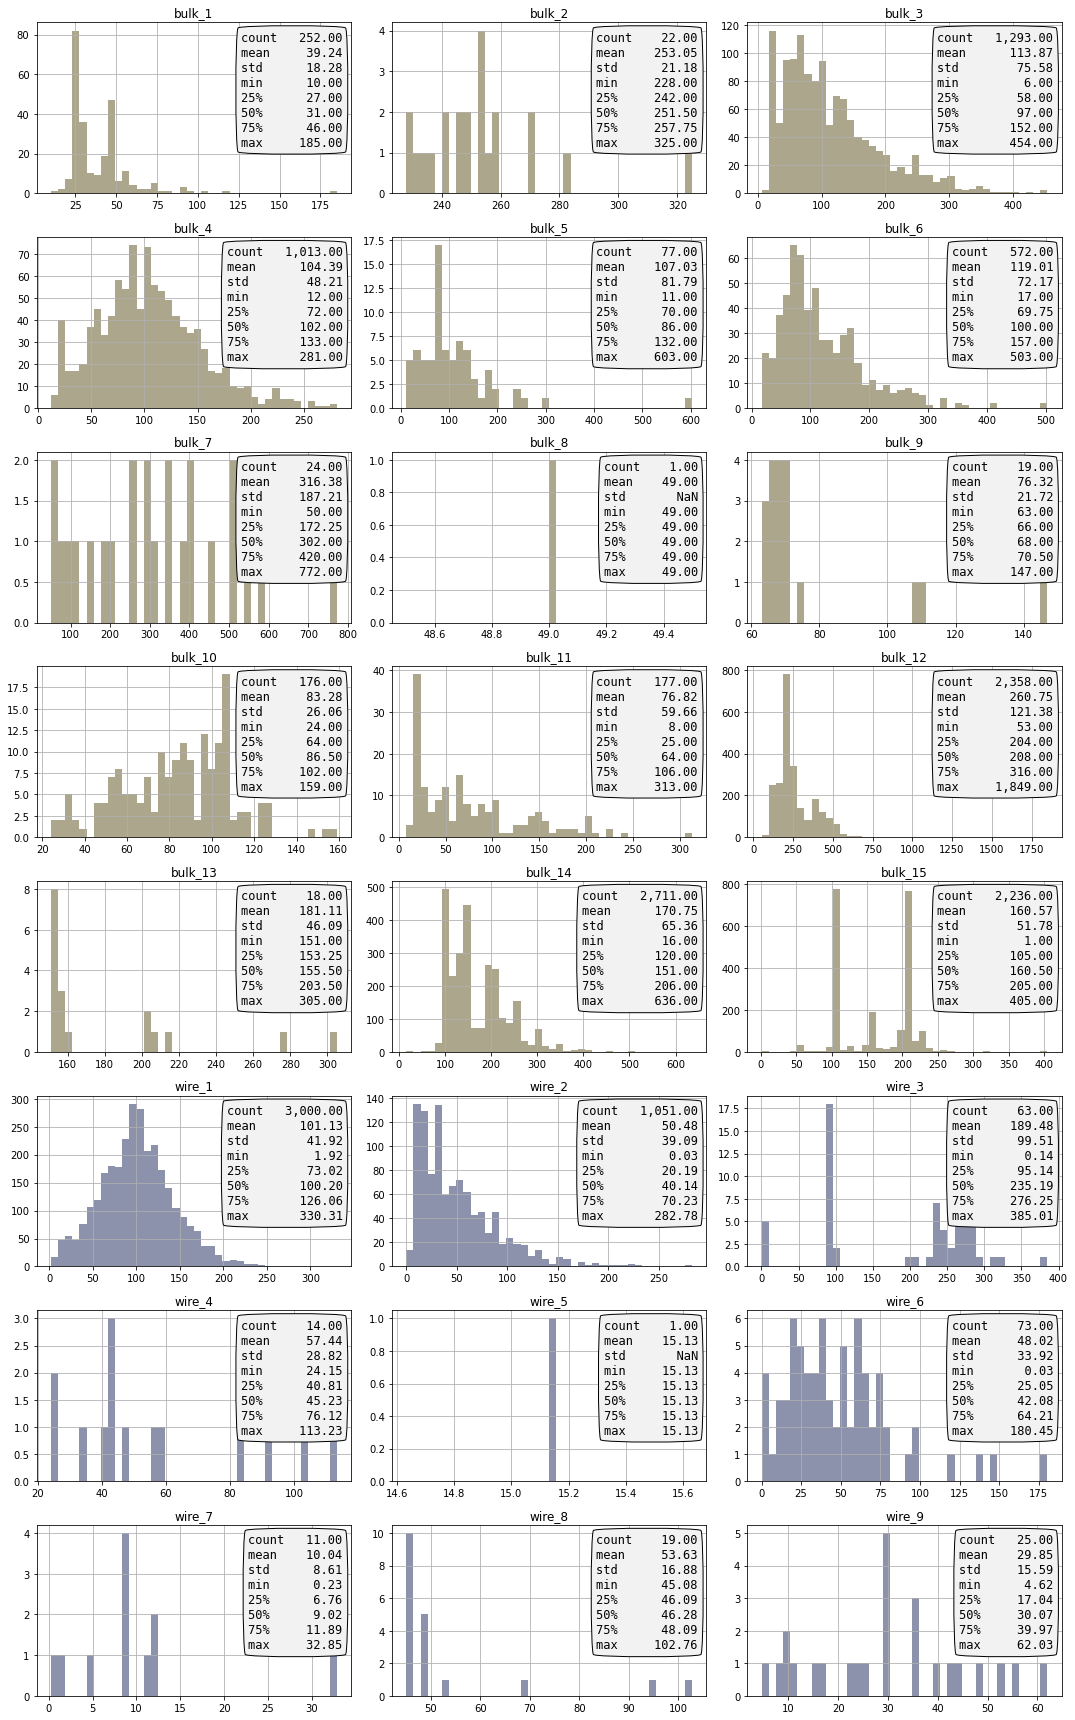

In [25]:
fig, ax = plt.subplots(8, 3)
fig.set_figheight(24)
fig.set_figwidth(15)

for i in range(24):
    col = data_addings.columns[i + 1]#column name  
    axis = ax[i // 3, i % 3]#choosing axis
    color = ['#8c92ac', '#aca68c']['bulk' in col]#choosing plot color
    
    data_addings[col].hist(bins=40, ax=axis, color=color)    
    axis.set_title(col)
    
    # extra info
    s = data_addings[col].describe().to_string()
    axis.text(0.973, 0.95, s, fontsize=12, transform=axis.transAxes, 
              bbox=dict(boxstyle="round4,pad=.5", fc="0.95"),
              horizontalalignment='right', verticalalignment='top',
              fontfamily='monospace')  

fig.tight_layout()
None

Во многих столбцах значений мало, чтобы судить о распределениях. И в целом распределения не являются нормальными.

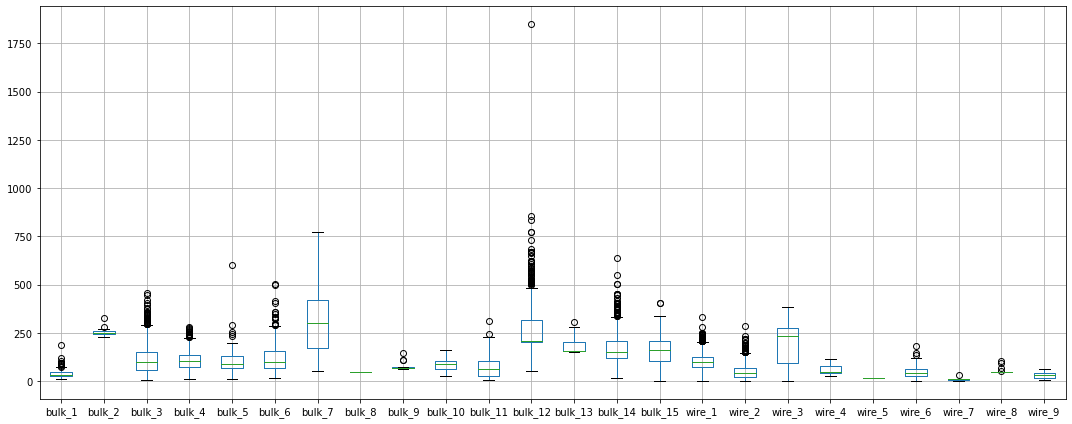

In [26]:
data_addings.loc[:, 'bulk_1':].boxplot(figsize=(15, 6))
plt.tight_layout()

In [27]:
addings_info = data_addings.loc[:,'bulk_1':].describe().transpose()
addings_info

,count,mean,std,min,25%,50%,75%,max
bulk_1,252.00,39.24,18.28,10.00,27.00,31.00,46.00,185.00
bulk_2,22.00,253.05,21.18,228.00,242.00,251.50,257.75,325.00
bulk_3,"1,293.00",113.87,75.58,6.00,58.00,97.00,152.00,454.00
bulk_4,"1,013.00",104.39,48.21,12.00,72.00,102.00,133.00,281.00
bulk_5,77.00,107.03,81.79,11.00,70.00,86.00,132.00,603.00
bulk_6,572.00,119.01,72.17,17.00,69.75,100.00,157.00,503.00
bulk_7,24.00,316.38,187.21,50.00,172.25,302.00,420.00,772.00
bulk_8,1.00,49.00,NaN,49.00,49.00,49.00,49.00,49.00
bulk_9,19.00,76.32,21.72,63.00,66.00,68.00,70.50,147.00
bulk_10,176.00,83.28,26.06,24.00,64.00,86.50,102.00,159.00


Одни добавки популярнее других. Чаще других используются следующие добавки:

In [28]:
print(*addings_info.sort_values(by='count', ascending=False).index[:10], sep='   ')

wire_1   bulk_14   bulk_12   bulk_15   bulk_3   wire_2   bulk_4   bulk_6   bulk_1   bulk_11


Самыми объемными в использовании являются следующие добавки:

In [29]:
print(*addings_info.sort_values(by='mean', ascending=False).index[:10], sep='   ')

bulk_7   bulk_12   bulk_2   wire_3   bulk_13   bulk_14   bulk_15   bulk_6   bulk_3   bulk_5


Исследуем общий объем добавленных присадок.

In [30]:
data_addings.insert(1, 'total', data_addings.loc[:, 'bulk_1':].sum(axis=1))

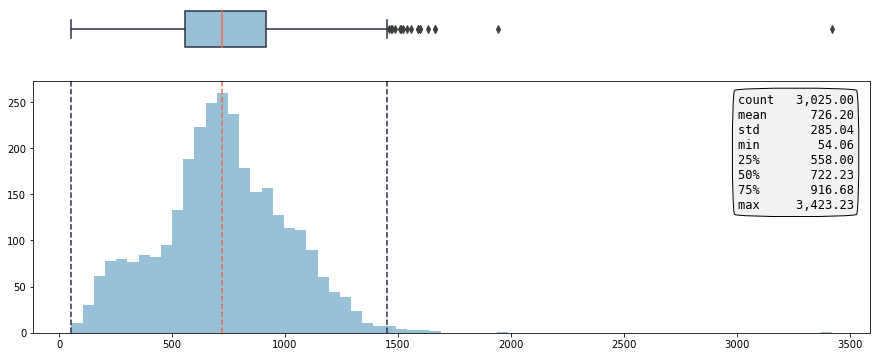

In [31]:
boxplot_hist(data_addings['total'])
None

### Данные о продуве газом

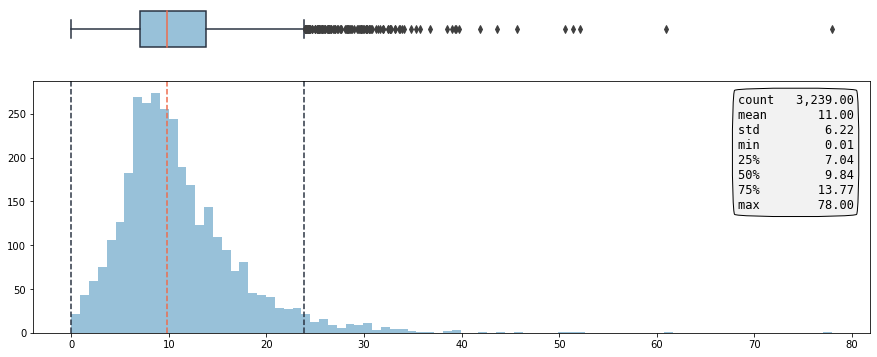

In [32]:
boxplot_hist(data_gas['gas_1'])
None

Распределение имеет "хвост". Проверим нормальность распределения:

In [33]:
check_distribution(data_gas.loc[:, 'gas_1':])

gas_1: 0.0


Распределение не является нормальным.

### Данные о температурах

Нам неизвестно, насколько корректно были измерены темпереатуры во время процесса. Сохраним только первую и последнюю измеренные температуры.

In [34]:
data_temperature = data_temp.groupby('key')['temperature'].agg(['first', 'last', 'count']).reset_index()

Важно, чтобы замеров температуры было как минимум 2: в начале и конце. Остальные строки придется удалить.

In [35]:
drop_indices = data_temperature[data_temperature['count'] < 2].index
data_temperature = data_temperature.drop(drop_indices)
data_temperature = data_temperature.drop('count', axis=1)

In [36]:
get_info(data_temperature)

,key,first,last
0,1,"1,571.00","1,613.00"
1,2,"1,581.00","1,602.00"
2,3,"1,596.00","1,599.00"
3,4,"1,601.00","1,625.00"
4,5,"1,576.00","1,602.00"



Всего строк: 2475
Уникальных номеров партий: 2475 

Количество пропусков в данных:
key      0
first    0
last     0

Количество дубликатов: 0


In [37]:
data_temperature.loc[:,'first':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
first,"2,475.00","1,588.40",29.24,"1,191.00","1,572.00","1,588.00","1,605.00","1,679.00"
last,"2,475.00","1,595.34",16.02,"1,541.00","1,587.00","1,593.00","1,599.00","1,700.00"


Обе температуры в основном находятся в пределах 1500 - 1600 градусов. В столбце с начальными температурами присутствует аномальное малое значение 1191. Уберем его.

In [38]:
drop_indices = data_temperature[data_temperature['first'] < 1300].index
data_temperature = data_temperature.drop(drop_indices)

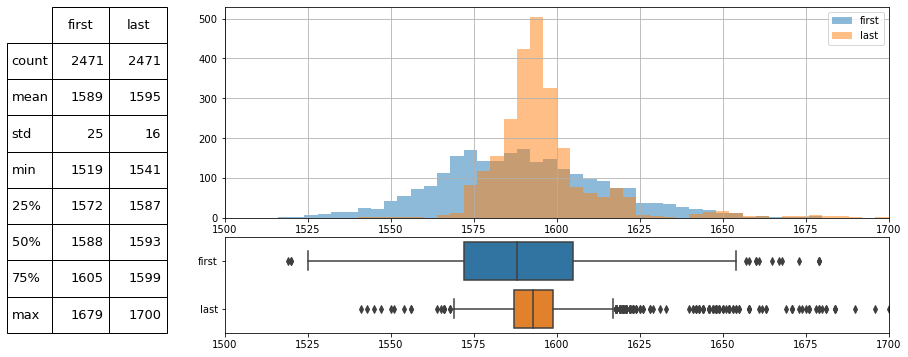

In [39]:
fig, ax = plt.subplot_mosaic([[0, 1, 1, 1, 1],
                              [0, 1, 1, 1, 1],
                              [0, 2, 2, 2, 2]                             
                             ])

fig.set_figheight(12)
df = data_temperature.loc[:,'first':].describe().astype(int)

mpl_table = ax[0].table(cellText = df.values,
                        rowLabels = df.index,
                        bbox=[0, 0, 0.8, 1],
                        colLabels=df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(13)
ax[0].axis('off')

columns = ['first', 'last']

for col in columns:
    data_temperature[col].hist(bins=50, figsize=(15,6), range=(1500, 1700), alpha = 0.5, ax=ax[1])
ax[1].legend(columns)
ax[1].set_xlim(1500, 1700)

sns.boxplot(data=data_temperature.loc[:, columns], 
            orient="h", ax=ax[2])

ax[2].set_xlim(1500, 1700)

None

Среднее значение и диапазоны значений у обеих температур сопоставимые, но стандартное отклонение у начальной больше и распределение более пологое.

У конечной температуры в районе 1650°C маленький локальный пик.

### Выводы

На данном этапе были подробно рассмотрены имеющиеся данные. Выявлены некоторые закономерности, проверены корреляции величин. Аномальные значения были исключены. Данные по всем таблицам аггрегированы так, чтобы одной партии соответствовала 1 строка данных.

## Построение модели машинного обучения

### Подготовка признаков

Сейчас у нас есть 4 таблицы с данными:
* *data_heating* - данные о нагреве электродами
* *data_addings* - данные о добавках
* *data_gas* - данные о продувке газом
* *data_temperature* - данные об измеренных температурах

Все таблицы имеют номера партий, причем каждой партии соответствует одна строка. Необходимо из объединить все данные в единую таблицу по номеру партии.

In [40]:
pd.options.display.float_format = '{:,.2f}'.format

def get_info(data):
    display(data.head())
    
    print("\nВсего строк:", data.shape[0], '\n')
    print(data.info())
    print("\nКоличество дубликатов:", data.duplicated().sum())

data = data_heating.set_index('key')

for other in [data_addings, data_gas, data_temperature]:
    data = data.join(other.set_index('key'), how='inner')
    
data = data.reset_index().drop('key', axis=1)
get_info(data)

,power,t,total,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,...,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,gas_1,first,last
0,5.83,1098,613.06,NaN,NaN,NaN,43.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.75,"1,571.00","1,613.00"
1,3.65,811,678.05,NaN,NaN,NaN,73.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.56,"1,581.00","1,602.00"
2,2.99,655,635.16,NaN,NaN,NaN,34.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.55,"1,596.00","1,599.00"
3,3.81,741,684.06,NaN,NaN,NaN,81.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.84,"1,601.00","1,625.00"
4,4.04,869,682.35,NaN,NaN,NaN,78.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.41,"1,576.00","1,602.00"



Всего строк: 2316 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   power    2316 non-null   float64
 1   t        2316 non-null   int32  
 2   total    2316 non-null   float64
 3   bulk_1   197 non-null    float64
 4   bulk_2   12 non-null     float64
 5   bulk_3   955 non-null    float64
 6   bulk_4   809 non-null    float64
 7   bulk_5   52 non-null     float64
 8   bulk_6   432 non-null    float64
 9   bulk_7   11 non-null     float64
 10  bulk_8   1 non-null      float64
 11  bulk_9   13 non-null     float64
 12  bulk_10  143 non-null    float64
 13  bulk_11  128 non-null    float64
 14  bulk_12  1802 non-null   float64
 15  bulk_13  13 non-null     float64
 16  bulk_14  2057 non-null   float64
 17  bulk_15  1691 non-null   float64
 18  wire_1   2294 non-null   float64
 19  wire_2   806 non-null    float64
 20  wire_3   38 non-null     float6

Ранее мы не заполняли пропуски в `bulk_1` ... `bulk_15` и `wire_1` ... `wire_9` чтобы иссследовать использование материалов. Пропуски означают, что добавка не была введена в партию. Заменим пропуски на 0.

In [41]:
data = data.fillna(0)

### Проверка на мультиколлинеарность

Одной из потенциальных моделей является линейная регрессия. Для линейных моделей принципиальным является отсутствие мультиколлинеарности. Проверим корреляцию между признаками:

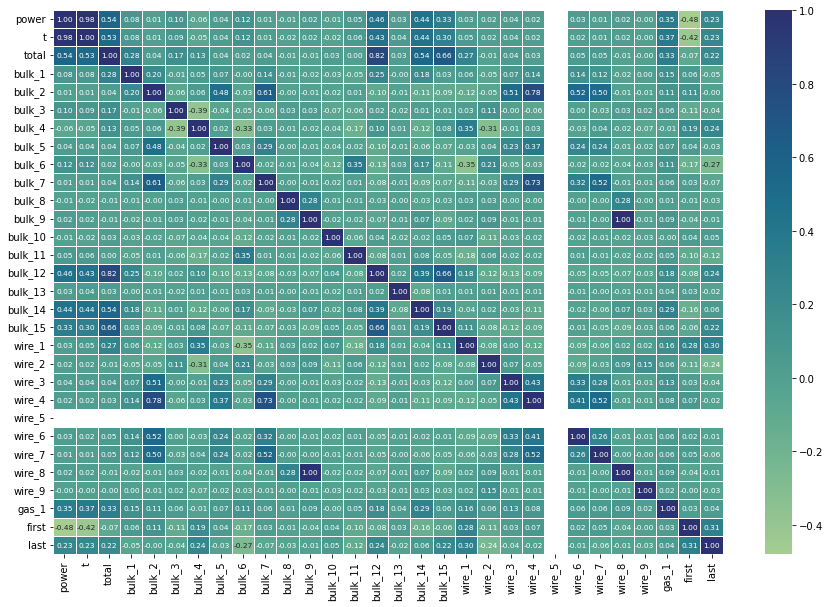

In [42]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(method='spearman'), annot=True, fmt=".2f", cmap="crest", linewidths=.5, annot_kws={"size": 7.5})
None

Выведем отдельно признаки с корреляцией больше 0.9:

In [43]:
for col1 in data.columns:
    for col2 in data.loc[:, col1:].columns:
        cor = data[col1].corr(data[col2], method='spearman')
        if abs(cor) >= 0.9 and col1 != col2: 
            print('\x1B[1m' + col1 + ' и ' + col2 + '\x1B[0m')
            print(' Всего значений:')
            print('  ', col1 + ':', (data[col1] > 0).sum())
            print('  ', col2 + ':', (data[col2] > 0).sum())
            print(' Корреляция:', round(cor, 2))
            print()

power и t
 Всего значений:
   power: 2316
   t: 2316
 Корреляция: 0.98

bulk_9 и wire_8
 Всего значений:
   bulk_9: 13
   wire_8: 13
 Корреляция: 1.0



Как мы упоминали при анализе, столбцы `power` и `t` имеют сильную корреляцию, для линейной регресии ставим только `power`. Кроме них `bulk_9` и `wire_8` имеют корреляцию 1, а так же мало значений. Оставим только `bulk_9`.

In [44]:
drop_col = ['wire_8', 't']

### Выделение признаков и таргета

**Признаки:**

- `power` - средняя мощность 
- `total` - объем всех добавок
- `bulk_1` ... `bulk_15` - объем сыпучих материалов
- `wire_1` ... `wire_9` - обьем проволочных материалов 
- `gas_1` - объем газа
- `first` - температура в начале процесса

Всего 29 признаков.

**Целевой признак:**
- `last` - конечная темпереатура перед розливом в заготовки.

Для обучения необходимо разделить данные на обучающую и тестовую выборки. Размер тестовой выборки - 25%.

In [45]:
target = data['last']
features = data.drop('last', axis = 1)

features_train, features_test, target_train, target_test = \
    train_test_split(features, target, test_size=.25, 
                     shuffle=True, random_state=310123)


print('Обучающая выборка:', features_train.shape[0], 'строк')
print('Тестовая выборка:', features_test.shape[0], 'строк')

Обучающая выборка: 1737 строк
Тестовая выборка: 579 строк


### Обучение моделей

В качестве моделей рассматриваются:

- Линейная регрессия
- Случайный лес
- CatBoost
- LGBM

Выбор модели основывается на минимизации метрики MAE.

In [46]:
def train_model(model, parameters, features, target):
    
    kf = KFold(n_splits=4)
    grid_search = GridSearchCV(model, parameters, cv=kf, 
                               scoring='neg_mean_absolute_error'
                               )
    grid_search.fit(features, target)
    
    return grid_search, grid_search.best_params_, round(abs(grid_search.best_score_), 2)

def printer(params, score):
    
    print('Параметры модели:')
    for key, value in params.items():
        print(f'  {key}: {value}')
    print('\nMAE =', round(score, 2))
    
def checker(score, value):
    if score > value:
        return '❌'
    else:
        return '✔️'
    
summary={}

#### Линейная регрессия

In [47]:
lr = LinearRegression()

scaler = StandardScaler()
features_train_lr = scaler.fit_transform(features_train.drop(drop_col, axis=1))

lr_score = - cross_val_score(lr, features_train_lr, target_train,
                             cv=4,
                             scoring = 'neg_mean_absolute_error').mean()

print('\nMAE =', round(lr_score, 2))

summary['Линейная регрессия'] = [round(lr_score, 2), checker(lr_score, 6.8)]


MAE = 6.99


#### Случайный лес

In [48]:
forest = RandomForestRegressor(random_state=310123)

parameters = {'max_depth': list(range(2, 15)),
              'n_estimators':list(range(35, 45))
             }

forest, forest_params, forest_score = \
    train_model(forest, parameters, features_train, target_train)

printer(forest_params, forest_score)

summary['Случайный лес'] = [forest_score, checker(forest_score, 6.8)]

Параметры модели:
  max_depth: 11
  n_estimators: 41

MAE = 6.32


#### CatBoost

In [49]:
cat = CatBoostRegressor(iterations=300, verbose=0, random_state=310123)

parameters = {'depth': list(range(1, 10))
             }

cat, cat_params, cat_score = \
    train_model(cat, parameters, features_train, target_train)

printer(cat_params, cat_score)

summary['CatBoost'] = [cat_score, checker(cat_score, 6.8)]

Параметры модели:
  depth: 2

MAE = 6.23


#### LGBM

In [50]:
lgbm = LGBMRegressor(random_state=310123)

parameters = {'max_depth': list(range(5, 10))
             }

lgbm, lgbm_params, lgbm_score = \
    train_model(lgbm, parameters, features_train, target_train)

printer(lgbm_params, lgbm_score)

summary['LGBM'] = [lgbm_score, checker(lgbm_score, 6.8)]

Параметры модели:
  max_depth: 5

MAE = 6.34


### Выбор лучшей модели

Сравним метрики всех моделей:

In [51]:
summary = pd.DataFrame(summary.values(), index=summary.keys(), columns=['MAE', 'check'])
mn = summary['MAE'].min()

highlighter = lambda x: ["background: #d9e3c4" if x['MAE'] == mn else ''] * len(x)
summary = summary.style.apply(highlighter, axis = 1).format('{:,.2f}', subset=['MAE'])
summary

,MAE,check
Линейная регрессия,6.99,❌
Случайный лес,6.32,✔️
CatBoost,6.23,✔️
LGBM,6.34,✔️


Все модели удовлетворяют требованию MAE < 6.8. Лучшее значение у модели CatBoost, поэтому она будет использована в качестве рабочей.

In [52]:
model = CatBoostRegressor(iterations=300,  verbose=0, **cat_params, random_state=310123)
model.fit(features_train, target_train)
None

### Выводы

На данном этапе была подготвлена единая таблица данных, проверена мультиколлинеарность признаков для модели линейной регрессии. Данные были разделены на обучающую и тестовую выборки.

Рассмотрены 4 модели: линейная регрессия, случайный лес, CatBoost и LGBM. Для каждой были подобраны гиперпараметры, чтобы минимизировать MAE. 

Все модели удовлетворили требованиям точности. В качестве рабочей модели выбрана CatBoost, так как ее значение MAE наименьшее.

## Тестирование модели

In [53]:
predictions = model.predict(features_test)
score = mae(predictions, target_test)
round(score, 2)

5.69

На тестовой выборке модель показывает удовлетворительное значение метрики. Сопоставим предсказаные значения с реальными:

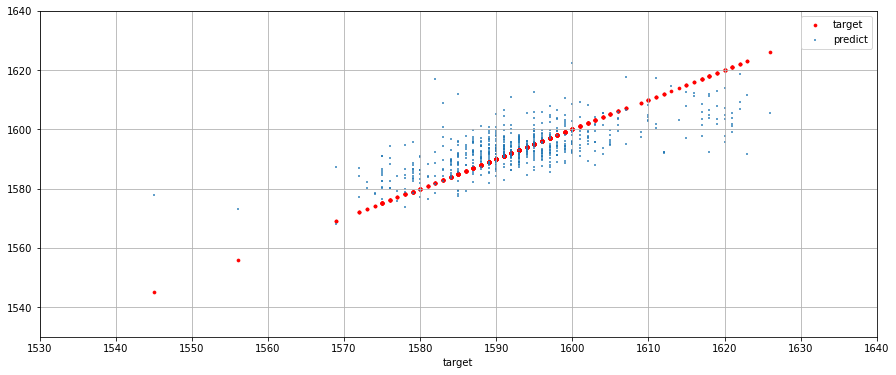

In [54]:
def plot_target_vs_predict(target, predictions, delta):

    limits = [1530, 1640]

    plt.scatter(target, target, label='target',  marker=".", lw=0.7, c='r')
    plt.scatter(target, predictions, label='predict', marker=",", lw=0, s=2, alpha=0.7)
    
    plt.xlim(limits)
    plt.ylim(limits)
    plt.xticks(range(limits[0], limits[1] + 1, 10))
    plt.grid(True)
    plt.xlabel('target')
    plt.legend()
    None

fig_t_vs_p = plt.figure(figsize=(15, 6))
plot_target_vs_predict(target_test, predictions, score)

Наиболее точно предсказываются температуры в пределах 1580 - 1600 градусов, что соответствет верхнему и нижнему квартилям. Вне этих пределов предсказнные значения отличаются от измеренных, причем в сторону среднего.

Рассмотрим, как признаки влияют на конечную температуру.

<AxesSubplot:>

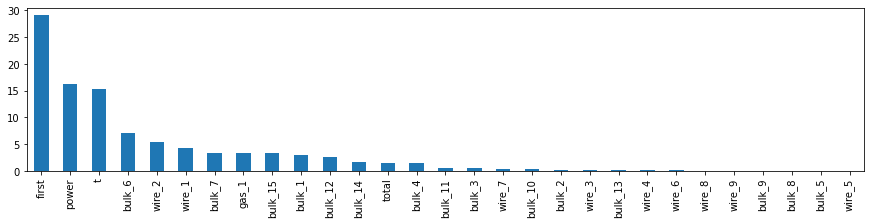

In [55]:
fig_importances = plt.figure(figsize=(15, 8))
importances = model.feature_importances_
importances = pd.Series(importances, index=features_train.columns)

importances.sort_values(ascending=False).plot.bar(figsize=(15,3))

Самыми главными признаками являются температура в начале процесса и мощность и продолжительность нагрева. Влиятельны оказались общий объем добавок и количество использованного газа. 

Добавки `bulk_1`, `bulk_6`, `bulk_12`, `bulk_14`, `bulk_15` и `wire_1`, `wire_2` оказались важнее других, так же они вошли в топ-10 самых часто используемых.

In [56]:
timer = time.time() - start
print(f'Время расчета: {int((timer % 3600) // 60)} мин. {int((timer % 3600) % 60)} сек.')

Время расчета: 2 мин. 27 сек.


## Отчет

### Введение

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе легирования стали. 

Цель проеката - построить модель, предсказывающую температуру стали в конце процесса перед розливом в заготовки.
Метрикой, определяющей качество предсказаний, является MAE. Ее значение должно быть не больше 6.8.

### Данные и признаки

Данные собраны и предоставлены комбинатом. В наличии было несколько файлов, содержащих информацию об обработке более 3 000 партий стали:

- время и мощность нагрева
- время и объем добавленных сыпучих и проволочных материалов
- объем использованного газа
- время и результаты замеров температуры

Прежде чем приступать к построению моделей, мы исследовали полученные данные. Информацию о времени оказалось невозможно использовать: между таблицами не было синхронизации. Остальные данные были подробробно рассмотрены: 

- выявлены и устранены партии с аномальными значениями
- введены новые признаки
- построены и проверены на нормальность распределения
- исследовано использование добавок, выявлены самые часто используемые материалы

Для обучения данные аггрегированы так, чтобы одной партии соответствовала 1 строка. В итоге мы получили 29 признаков. Обнаружена мультиколлинеарность некоторых из них, что могло отразится на качестве обучения. 

### Модели

Были выбраны 4 потенциальные модели:

- Линейная регрессия
- Случайный лес
- CatBoost
- LGBM

Для каждой модели были подобраны гиперпараметры для минимизации MAE. При подборе использовалась кросс-валидация. В результате обучения моделей получены следующие результаты:

In [57]:
summary

,MAE,check
Линейная регрессия,6.99,❌
Случайный лес,6.32,✔️
CatBoost,6.23,✔️
LGBM,6.34,✔️


Модель CatBoost показала лучшее значение метрики, поэтому она выбрана в качестве рабочей.

### Тестирование

Рабочая модель была проверена на тестовой выборке. Полученное значение МАЕ = 5.78 удовлетворяет требованию точности. 

Мы исследовали особенности предсказаний модели. Лучшие результаты модель показывает тогда, когда реальная температура лежит в пределах 1580 - 1600 градусов. Вне этих пределов предсказаниям оказались неточными, поэтому стоит разобраться в причинах таких температур, чтобы лучше их учесть в моделях. 

Также рассмотрено, как влияют признаки на конечную температуру.

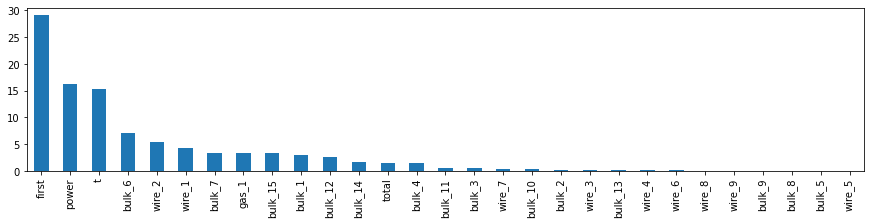

In [58]:
fig_importances

Самыми главными признаками являются начальная температура и нарев: его мощность и продолжительность. Влиятельным оказалось и количество использованного для перемешивания газа. Некоторые добавки оказались важнее других.

### Заключение

Используя машинное обучение, мы получили хорошие результаты для предсказания температуры розлива. В процессе разработки проекта мы обнаружили много закономернстей и особенностей данных. 

Важным этапом стал подбор признаков и выбор аггрегирования данных. Например, ввод продолжительности нагрева как признака улучшило метрики моделей при кросс-валидации.

Также мы оценили важность признаков при опредлениии температуры в ковше. Полученная информация поможет оптимизировать процесс обработки, сделать его более энергоэффективным и, как следствие, уменьшить издержки производства. 